<div style="background-color: #f5f5f5; padding: 15px; color: black; width: 80%;"><b>Цель занятия</b> — познакомиться с методом опорных векторов — дифференцируемой моделью машинного обучения для классификации, которая максимизирует зазор между классами данных.</div>

## Визуальная демонстрация алгоритма

<div style="background-color: #e0fff3; padding: 15px; color: black; width: 80%;">  <b>Метод опорных векторов (англ. Support Vector Machine, SVM)</b> — это алгоритм машинного обучения, использующийся для классификации. Он основывается на поиске гиперплоскости в пространстве признаков, которая наилучшим образом разделяет данные на два класса.</div>



В случае SVM мы ищем гиперплоскость, которая максимизирует зазор (отступ между двумя классами данных). <b>Зазор (опорный вектор)</b> в контексте SVM — это расстояние от гиперплоскости до ближайшей точки каждого класса.

Визуальная демонстрация алгоритма представлена на рисунке.


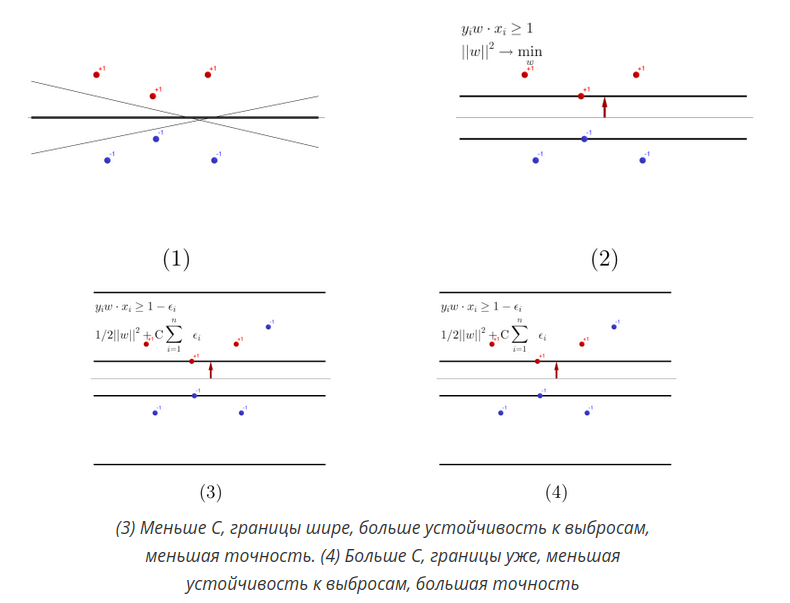
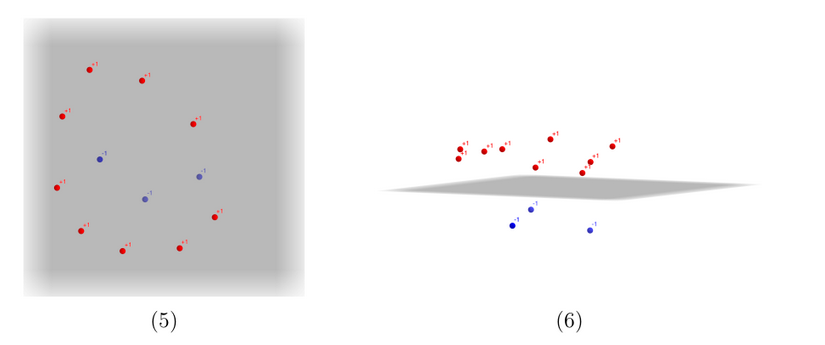

На рисунках (1) и (2) отображена суть SVM — поиск гиперплоскости в пространстве признаков, которая наилучшим образом разделяет данные на два класса (оптимальный отступ). Однако такая безусловная оптимизация (Hard-margin SVM) не приспособлена для работы с объектами, которые классифицируются неправильно.

Для таких случаев вводятся дополнительные переменные $\epsilon_i$, которые разрешают на некоторых объектах делать отступ меньше единицы. Также вводится коэффициент С, который позволяет выбирать, что важнее — сделать отступ шире либо сделать точность модели лучше — (3) и (4).

На рисунках (5) и (6) показан так называемый Kernel trick в SVM. Для линейно неразделимых выборок можно увеличить размерность данных для того, чтобы данные стали линейно разделимыми.

## Описание алгоритма

Дадим формальное определение алгоритма SVM.

<div style="background-color: #e0fff3; padding: 15px; color: black; width: 80%;">  <b>SVM(англ. Support Vector Machine)</b> — это алгоритм машинного обучения для задач классификации и регрессии. Он находит оптимальную гиперплоскость, которая разделяет два класса данных с наибольшим зазором (margin) между ними и наименьшим количеством ошибок при классификации.</div>

Рассмотрим SVM для линейно разделимых выборок.

<div style="background-color: #e0fff3; padding: 15px; color: black; width: 80%;">  <b>Hard-margin SVM</b> — это метод машинного обучения, который находит линейную гиперплоскость, разделяющую два класса данных в линейно разделимом случае. Он предполагает, что существует идеальная разделяющая гиперплоскость, которая не допускает никаких ошибок классификации на обучающем наборе данных.</div>

Пусть дано обучающее множество $X $с $n$ элементами, где каждый элемент $x$ представлен вектором $p$ признаков, и метки классов $y_i$, где $y_i$ принимает значение 1 или -1, обозначающее класс, к которому относится i-й элемент.

Тогда Hard-margin SVM ищет линейную гиперплоскость $f (x) = w^T x$ , которая разделяет два класса данных с наибольшим зазором(margin) между ними и отступом: 

$y_i (w \cdot x_i + w_0) >0$
.

Зазор определяется как расстояние от гиперплоскости до ближайших элементов каждого класса. Отступ от гиперплоскости вычисляется по формуле: 

$ \frac{|w \cdot x_i+w_0|}{\|w\|} $

Соответственно, зазор вычисляется как:

$ \min _{x_i \in X} \frac{|w \cdot x_i+w_0|}{\|w\|} $

Можно вернуться к зазору классификатора. Так как $ ∥w∥ $ не зависит от $i$, он выносится за знак минимума, $ \min_{x_i \in X}|w \cdot x_i + w_0| $ равен 1 после нормировки. Соответственно, зазор равен:

$ \min _{x_i \in X} \frac{|w \cdot x_i+w_0|}{∥w∥} = \frac{\min _{x_i \in X}|w \cdot x_i+w_0|}{∥w∥} = \frac{1}{∥w∥} $

Появляется ряд требований к модели, на основе которых можно определить условную оптимизацию для модели:

- $ y_i (w \cdot x_i + w_0) >0 $

- максимальный зазор для классификатора: $ \max_{w} \frac{1}{∥w∥} $  при условии, что $ |w \cdot x_i + w_0| \geq 1 $.

Максимизация $ \max_{w} \frac{1}{∥w∥} $ эквивалентна  минимизации $\min_{w} ∥w∥$.

В итоге получается задача условной оптимизации для SVM:

$ {\begin{array}{l} ∥w∥^2 \rightarrow \min _w(∥w∥^2 \text{берется в квадрате для облегчения вычисления производных}) \\ ∥w∥ \cdot x_i+w_0| \geq 1 \end{array} }$

Решение этой задачи оптимизации находит вектор весов w и смещение b, которые определяют разделяющую гиперплоскость и минимизируют норму вектора весов.

<div style="background-color: #f5f5f5; padding: 15px; color: black; width: 80%;">Таким образом, Hard-margin SVM ищет идеальную гиперплоскость, которая разделяет данные на два класса и не допускает никаких ошибок классификации на обучающем наборе данных. Однако такой подход может быть чувствителен к выбросам и не работать в случае, когда данные линейно неразделимы.</div>

В случае если выборка линейно неразделима, условие невалидно. Для этого случая используется Soft-margin SVM.

<div style="background-color: #e0fff3; padding: 15px; color: black; width: 80%;"><b>  Soft-margin SVM</b> — это модификация классического Hard-margin SVM, которая позволяет решать задачи классификации, учитывая наличие шумовых или выбросовых данных в обучающей выборке. В отличие от классического SVM, где решающая граница строго разделяет классы, в Soft-margin SVM допускаются некоторые ошибки классификации за счет допуска нарушения ограничений на расстояние от объектов до разделяющей границы (margin).</div>

Формально Soft-margin SVM решает задачу оптимизации, минимизируя следующий функционал:

$ \begin{array}{l} y_i w \cdot x_i \geq 1-\epsilon_i \\ \frac{1}{2}\|w\|^2+C \sum_{i=1}^n \epsilon_i \rightarrow \min _w \end{array} $

где $ y_i \in \{−1,1\} $— класс объекта,<br>
$ x_i $— вектор его признаков,<br>
$w$— вектор весов,<br>
$ \epsilon_i$— дополнительные переменные, обозначающие степень нарушения ограничений на margin для каждого объекта,<br>
$C$— гиперпараметр, определяющий вес ошибки классификации в оптимизационной задаче.

<div style="background-color: #f5f5f5; padding: 15px; color: black; width: 80%;">Таким образом, в Soft-margin SVM допускаются объекты, которые находятся внутри margin или даже на неправильной стороне, разделяющей границы. При этом степень нарушения ограничений контролируется параметром . Большее значение приводит к более строгой классификации, тогда как меньшее значение допускает большее количество ошибок классификации.</div>

## Подготовка данных для алгоритма

Перед применением алгоритма SVM необходимо выполнить необходимые шаги подготовки данных.

<b>Очистка данных</b> — удаление неполных или некорректных записей, заполнение пропущенных значений и преобразование данных в формат, подходящий для анализа.

<b>Нормализация данных </b>— приведение данных к общему масштабу, чтобы каждый признак имел одинаковый вклад в анализ. Нормирование признаков — важный шаг в предобработке данных перед использованием SVM. Это связано с тем, что SVM оценивает веса (коэффициенты) каждого признака в модели, чтобы предсказать целевую переменную.



Если масштабы разных признаков значительно отличаются друг от друга, то оценка весов может быть смещена в сторону признаков с большими значениями. Это может привести к неверным выводам и плохому качеству предсказания.

Обычно используются два основных способа нормирования:

 - <b>   Стандартизация</b>. Признаки масштабируются так, чтобы их среднее значение было равно 0, а стандартное отклонение было равно 1.
- <b>    Нормализация</b>. Признаки масштабируются так, чтобы их значения находились в диапазоне от 0 до 1.


После нормирования признаков каждый из них будет иметь примерно одинаковый вклад в предсказание целевой переменной, что позволит SVM более точно оценивать их веса и делать более точные прогнозы.

<b>Разбиение данных на обучающую и тестовую выборки</b>. Обучающая выборка используется для обучения модели, а тестовая выборка — для оценки ее точности.


## Процесс обучения

Обучение SVM с использованием градиентного спуска включает в себя следующие шаги:

1. <b>Формирование обучающего набора данных</b>. Подготавливаем обучающий набор данных, содержащий объекты, каждый из которых имеет некоторые признаки и относится к одному из двух классов.
2. <b>Выбор функции потерь</b>. В SVM обычно используют функцию потерь hinge loss, которая выражается следующим образом: $L (y_i ,w) =max (0,1− y_i (w^T x_i))$ , где $y_i$— метка класса для объекта $i, w$ — параметры гиперплоскости, а $x_i$— вектор признаков объекта $i$.
3. <b>Определение оптимальных параметров.</b> SVM имеет гиперпараметр С, который определяет, насколько много ошибок классификации допускает SVM. В данном случае его можно интерпретировать как коэффициент регуляризации, который позволяет контролировать сложность модели. Параметр С может быть настроен с помощью кросс-валидации.
4. <b>Определение градиента</b>. В случае hinge loss градиент выражается следующим образом: <br>
$ \frac{\partial L(y_i, \mathbf{w})}{\partial \mathbf{w}}= \begin{cases}-y_i \mathbf{x}_{\mathbf{i}}, & \mathbf{w}^T \mathbf{x}_{\mathbf{i}}>1 \\ 0, & \text { иначе }\end{cases}$
5. <b>Обновление параметров</b>. Для обновления параметров $w$ и $b$ используется формула градиентного спуска: $ w \leftarrow w− \alpha \frac{\partial L}{\partial w} $, где $\alpha$— скорость обучения, которая определяет, как быстро меняются параметры.
6. <b>Определение условия останова</b>. Обучение останавливается, когда достигается некоторый критерий останова. Например, когда достигается максимальное количество итераций или когда функция потерь перестает уменьшаться на заданном уровне точности.
7. <b>Повторение шагов 4–6</b>. Шаги 4–6 повторяются до тех пор, пока модель не достигнет заданного уровня точности или не будет выполнен критерий останова.
8. <b>Построение гиперплоскости</b>. После обучения SVM гиперплоскость, разделяющая два класса, может быть построена из параметров $w$.

## Оценка качества алгоритма

Для оценки качества алгоритма SVM часто используют следующие метрики:

- <b>Accuracy:</b> $\frac{TP+TN}{TP+TN+FP+FN}$.

- <b>Precision:</b>$\frac{TP}{TP+FP}$

- <b>Recall:</b>$\frac{TP}{TP+FN}$

- <b>F1: </b> $2* \frac{precision*recall}{precision+recall}$

## Интерпретация признаков с помощью алгоритма

Интерпретация признаков в SVM заключается в понимании того, как каждый признак влияет на зависимую переменную в модели. Это может помочь понять, какие признаки наиболее важны для прогнозирования целевой переменной и как они связаны с ней.

Наиболее простой способ оценить влияние того или иного признака — посмотреть на весовой коэффициент при признаке. Коэффициенты признаков в SVM представляют величину и направление влияния каждого признака на зависимую переменную.

Если значение признака большое, можно сказать, что его значение также большое \(при условии нормализованных данных). Если коэффициент положительный, то увеличение значения признака будет приводить к увеличению значения зависимой переменной. Если коэффициент отрицательный, то увеличение значения признака будет приводить к уменьшению значения зависимой переменной.

<div style="border: 1px solid white; padding: 5px; margin-right: auto;  width: 80%;">Важно отметить, что интерпретация признаков в SVM должна быть осуществлена с осторожностью, поскольку влияние каждого признака на принятие решения может зависеть от остальных признаков и от их взаимодействия. Кроме того, при использовании ядерных SVM, интерпретация признаков может быть затруднена. Это связано с тем, что признаковое пространство может быть преобразовано в другое пространство, где трудно понять, какие именно признаки оказывают влияние на решение.</div>

## Модификации алгоритма

<div style="background-color: #f5f5f5; padding: 15px; color: black; width: 80%;">Существует несколько модификаций алгоритма SVM, которые могут быть применены в зависимости от задачи и данных. Некоторые из них перечислены ниже.</div>

<b>Soft-margin SVM</b> разрешает некоторым объектам попадать внутрь границы разделения классов \(маргинала), что снижает требования к разделимости данных. Это позволяет создать более гибкую границу разделения, которая может лучше обобщать на новые данные, которые могут быть не идеально разделимыми.

Вместо того чтобы минимизировать только ошибки классификации, как в Hard-margin SVM, Soft-margin SVM минимизирует ошибки классификации и штрафует за нарушение границы маргинала.

<b>SVM с ядрами</b> позволяет перевести нелинейно разделимые данные в более высокую размерность пространства, где данные могут быть линейно разделимыми.

Вместо того чтобы искать гиперплоскость, разделяющую данные в исходном пространстве признаков, SVM с ядрами ищет гиперплоскость в новом пространстве, созданном путем применения функции ядра к исходным данным.

Некоторые из наиболее распространенных ядер SVM включают в себя:

- <b>Линейное ядро</b> — простейшее ядро, которое используется для линейной разделимости классов.
- <b>Полиномиальное ядро</b> используется для увеличения размерности пространства данных и построения нелинейных границ.
- <b>RBF (Radial Basis Function) ядро</b> — самое распространенное ядро, которое создает нелинейную разделяющую гиперплоскость.
- <b>Sigmoid ядро</b> используется для задач классификации с нелинейной разделимостью.

<b>Multi-class SVM</b> позволяет обрабатывать данные с несколькими классами. Одним из подходов является использование метода «один против всех», в котором SVM обучается для каждого класса, чтобы отличать его от всех остальных классов.

<b>Incremental SVM</b> позволяет обучать SVM на больших объемах данных, постепенно добавляя новые объекты и/или признаки к обучающей выборке. Это удобно, если данные поступают постепенно или если вычислительные ресурсы ограничены.

<b>Online SVM</b> позволяет обучать SVM на потоке данных, который может быть бесконечным или динамическим. Это достигается путем последовательного обновления параметров SVM по мере получения новых данных.


## Область применения алгоритма

Некоторые из основных областей применения алгоритма SVM:

- <b>Классификация текстов</b>. SVM может быть использован для классификации текстовых данных на положительные и отрицательные классы. Например, электронные письма или отзывы на продукты.
- Биоинформатика. SVM может быть использован для классификации белков, распознавания генов и прогнозирования свойств биомолекул.
- Компьютерное зрение. SVM может быть использован для обнаружения объектов на изображении, распознавания лиц, классификации изображений и т. д.
- Финансовый анализ. SVM может быть использован для прогнозирования цен на акции и классификации инвестиционных продуктов.
- Интернет-реклама. SVM может быть использован для классификации пользователей в зависимости от их поведения в интернете и предсказания того, какие рекламные объявления будут наиболее эффективны для конкретного пользователя.
- Анализ данных. SVM может быть использован для кластеризации и классификации данных, таких как данные о клиентах, данные о продажах и данные о производственных процессах.
- Медицинская диагностика. SVM может быть использован для классификации медицинских данных, таких как изображения CT и MRI, для определения наличия или отсутствия определенного заболевания.


<div style="background-color: #f5f5f5; padding: 15px; color: black; width: 80%;">В целом, алгоритм SVM — мощный инструмент машинного обучения, который может использоваться для решения различных задач классификации в различных областях.</div>

## Плюсы и минусы алгоритма

Алгоритм SVM имеет ряд преимуществ и недостатков.

 	😃 
-    Эффективность. SVM хорошо справляется с выборкой большого объема и с большим количеством признаков.
-    Хорошая обобщающая способность. SVM может обучаться на небольшом количестве данных не переобучаясь.
-    Гибкость. SVM может использоваться с различными типами ядер, что позволяет адаптироваться к различным задачам.
-    Высокая точность. SVM может давать высокую точность при решении задач классификации.

😥
-    Чувствительность к выбросам. SVM чувствителен к выбросам в данных, что может привести к неправильным результатам.
-    Не подходит для несбалансированных данных. Если данные несбалансированы, то SVM может давать неправильные результаты.
-    Выбор ядра. Выбор подходящего ядра для конкретной задачи может быть сложным.
-    Не подходит для большого числа классов. SVM не всегда подходит для задач с большим числом классов.

В целом, алгоритм SVM — мощный инструмент машинного обучения, который имеет свои преимущества и недостатки. При выборе алгоритма необходимо учитывать особенности конкретной задачи и обеспечивать подходящую настройку параметров SVM.

В библиотеке Scikit-learn также реализован класс SVC для SVM. Класс SVC имеет следующие параметры:

- C — коэффициент регуляризации. Меньшие значения C создают более широкие разделяющие гиперплоскости, позволяющие большему количеству наблюдений нарушать ограничения. По умолчанию C=1.
- kernel — ядро, используемое в SVM. Поддерживаются линейное ядро, радиальное ядро базисной функции (RBF), полиномиальное ядро и другие. По умолчанию используется RBF.
- degree — степень полиномиального ядра. Используется только если kernel='poly'. По умолчанию degree=3.
- gamma — коэффициент ядра RBF. Большие значения gamma приводят к более точному соответствию обучающим данным, но могут приводить к переобучению. По умолчанию gamma='scale'. Это означает, что оно будет равно 1 / (n_features * X.var ()), где X — обучающая выборка.
- coef0 — свободный член, используемый в ядрах полинома и сигмоиды. По умолчанию coef0=0.0.
- shrinking — булевый параметр, указывающий, должен ли использоваться алгоритм уменьшения границ. По умолчанию shrinking=True.
- probability — булевый параметр, указывающий, должны ли выдаваться оценки вероятности для классификации. По умолчанию probability=False.
- tol — критерий останова оптимизации. По умолчанию tol=1e-3.
- max_iter — максимальное количество итераций. По умолчанию max_iter=-1, что означает, что нет ограничения на количество итераций.

Класс SVC имеет метод fit(X, y) для обучения модели на данных X и y, а также метод predict(X) для предсказания целевых значений для новых данных X. Кроме того, класс SVC имеет методы score(X, y) и get_params() для получения оценки точности модели и параметров модели соответственно.